<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    98.899697  81.266071  49.553998 -43.144381  196.575386   
      1.0    64.655419  61.187116  71.995787 -18.124024  189.714299   
      2.0    51.901521  39.913970  32.263277 -80.306905   53.771863   
      3.0    60.095701  54.717036  37.666278 -25.441807  137.037208   
      4.0    34.458797  63.439529  61.968696  59.038738  228.905761   
...                ...        ...        ...        ...         ...   
999.0 245.0  70.669612  38.521029  43.050862 -10.637506  151.603998   
      246.0  80.184370  44.490370  61.925228 -25.919326  170.680642   
      247.0  80.149520  21.932121  28.065477  -4.071594  136.075525   
      248.0  77.140148  21.288186  95.826507  25.566488  229.821329   
      249.0  87.157367  91.972602  45.416941 -36.653803  197.893107   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    239.738237 -43.162851  
      1.0    209.702368 -19.988070  
      2.0    134.282856 -80.510993  
      3.0    164.087717 -27.050509  
      4.0    177.352615  51.553146  
...                 ...        ...  
999.0 245.0  157.137126  -5.533128  
      246.0  193.178168 -22.497526  
      247.0  126.825227   9.250298  
      248.0  204.107561  25.713768  
      249.0  233.890602 -35.997495  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    98.899697  81.266071  49.553998 -43.144381  196.575386   
      1.0    64.655419  61.187116  71.995787 -18.124024  189.714299   
      2.0    51.901521  39.913970  32.263277 -80.306905   53.771863   
      3.0    60.095701  54.717036  37.666278 -25.441807  137.037208   
      4.0    34.458797  63.439529  61.968696  59.038738  228.905761   
...                ...        ...        ...        ...         ...   
999.0 245.0  70.669612  38.521029  43.050862 -10.637506  151.603998   
      246.0  80.184370  44.490370  61.925228 -25.919326  170.680642   
      247.0  80.149520  21.932121  28.065477  -4.071594  136.075525   
      248.0  77.140148  21.288186  95.826507  25.566488  229.821329   
      249.0  87.157367  91.972602  45.416941 -36.653803  197.893107   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    239.738237 -43.162851  
      1.0    209.702368 -19.988070  
      2.0    134.282856 -80.510993  
      3.0    164.087717 -27.050509  
      4.0    177.352615  51.553146  
...                 ...        ...  
999.0 245.0  157.137126  -5.533128  
      246.0  193.178168 -22.497526  
      247.0  126.825227   9.250298  
      248.0  204.107561  25.713768  
      249.0  233.890602 -35.997495  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    98.899697  81.266071  49.553998 -43.144381  196.575386   
      1.0    64.655419  61.187116  71.995787 -18.124024  189.714299   
      2.0    51.901521  39.913970  32.263277 -80.306905   53.771863   
      3.0    60.095701  54.717036  37.666278 -25.441807  137.037208   
      4.0    34.458797  63.439529  61.968696  59.038738  228.905761   
...                ...        ...        ...        ...         ...   
999.0 245.0  70.669612  38.521029  43.050862 -10.637506  151.603998   
      246.0  80.184370  44.490370  61.925228 -25.919326  170.680642   
      247.0  80.149520  21.932121  28.065477  -4.071594  136.075525   
      248.0  77.140148  21.288186  95.826507  25.566488  229.821329   
      249.0  87.157367  91.972602  45.416941 -36.653803  197.893107   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    239.738237 -43.162851  
      1.0    209.702368 -19.988070  
      2.0    134.282856 -80.510993  
      3.0    164.087717 -27.050509  
      4.0    177.352615  51.553146  
...                 ...        ...  
999.0 245.0  157.137126  -5.533128  
      246.0  193.178168 -22.497526  
      247.0  126.825227   9.250298  
      248.0  204.107561  25.713768  
      249.0  233.890602 -35.997495  

[250000 rows x 7 columns]

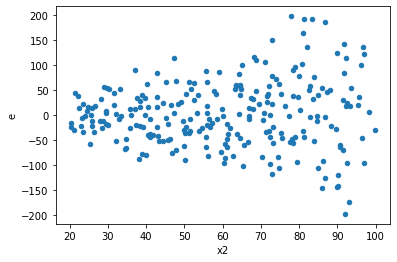

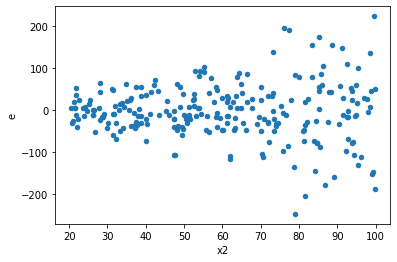

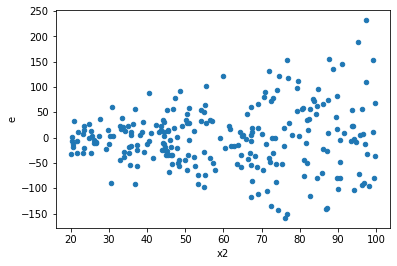

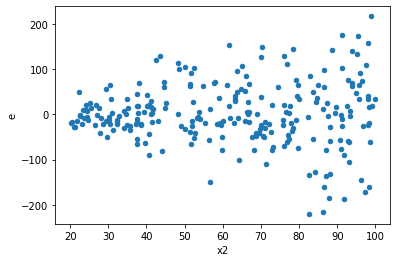

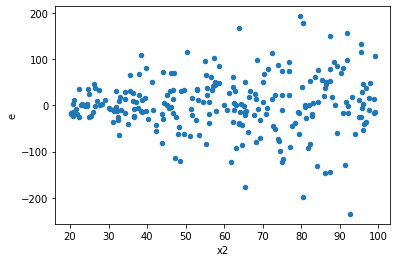

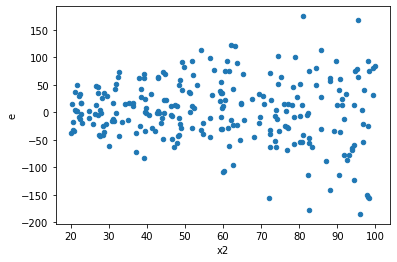

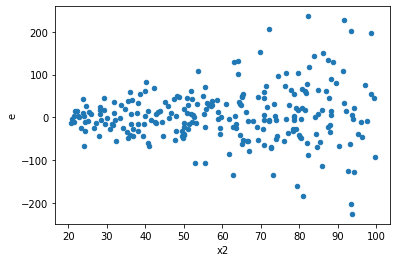

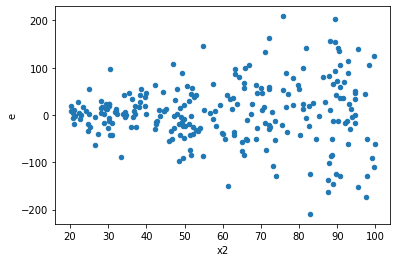

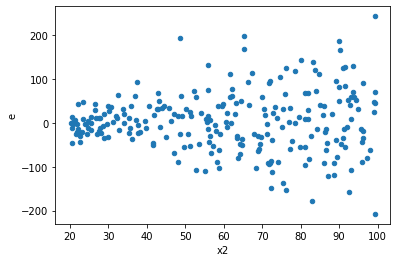

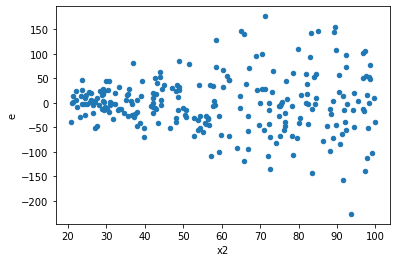

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,123.0,121.0,356910.2104618938,681552.2174252629,2901.709028145478,5632.662953927793,1.9411536095773547,0.00029556803021479894,0.9998522159848926,0.00014778401510739947,Reject001=0 : Heteroscedasticity
1.0,121.0,123.0,239228.27125152465,823657.6591964166,1977.0931508390468,6696.4037333042,3.3869945533230705,6.083755721419948e-11,0.9999999999695812,3.041877860709974e-11,Reject001=0 : Heteroscedasticity
3.0,103.0,141.0,345291.73591111274,816240.0744148508,3352.3469505933276,5788.936697977665,1.726831018177605,0.0026334421371050354,0.9986832789314475,0.0013167210685525177,Reject001=0 : Heteroscedasticity
4.0,129.0,115.0,433779.8698958721,460022.7908802365,3362.6346503555974,4000.198181567274,1.1896023795342305,0.34228823975324074,0.8288558801233796,0.17114411987662037,Reject001=1 : Homoscedasticity
7.0,121.0,123.0,297518.6328448314,741891.4424866687,2458.8316764035653,6031.637743794055,2.453050284684916,1.1028572781679458e-06,0.9999994485713609,5.514286390839729e-07,Reject001=0 : Heteroscedasticity
10.0,112.0,132.0,270579.00399376586,739530.2514938674,2415.8839642300522,5602.501905256571,2.319027729894346,4.0056976975400005e-06,0.9999979971511512,2.0028488487700002e-06,Reject001=0 : Heteroscedasticity
12.0,130.0,114.0,326882.5981480008,525332.8317099144,2514.4815242153904,4608.182734297495,1.8326572257218772,0.0010330932707183216,0.9994834533646408,0.0005165466353591608,Reject001=0 : Heteroscedasticity
13.0,130.0,114.0,287910.86574787897,534235.7077882009,2214.698967291377,4686.27813849299,2.1159887676402387,5.3572495837039824e-05,0.9999732137520815,2.6786247918519912e-05,Reject001=0 : Heteroscedasticity
15.0,126.0,118.0,306605.9905885001,775048.8703663262,2433.380877686509,6568.210765816323,2.6992119589847876,9.60424368923185e-08,0.9999999519787816,4.802121844615925e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,123.0,121.0,356910.2104618938,681552.2174252629,2901.709028145478,5632.662953927793,1.9411536095773547,0.00029556803021479894,Reject001=0 : Heteroscedasticity
1.0,121.0,123.0,239228.27125152465,823657.6591964166,1977.0931508390468,6696.4037333042,3.3869945533230705,6.083755721419948e-11,Reject001=0 : Heteroscedasticity
2.0,103.0,141.0,575977.6395290768,344104.79709776805,5592.015917758027,2440.45955388488,0.4364185634978161,1.3408438570338497e-05,Reject001=0 : Heteroscedasticity
3.0,103.0,141.0,345291.73591111274,816240.0744148508,3352.3469505933276,5788.936697977665,1.726831018177605,0.0026334421371050354,Reject001=0 : Heteroscedasticity
4.0,129.0,115.0,433779.8698958721,460022.7908802365,3362.6346503555974,4000.198181567274,1.1896023795342305,0.34228823975324074,Reject001=1 : Homoscedasticity
5.0,121.0,123.0,459111.2640361837,347626.8645030327,3794.3079672411877,2826.2346707563634,0.7448616968251254,0.10538257341780764,Reject001=1 : Homoscedasticity
6.0,121.0,123.0,655915.3030126541,335472.64128978143,5420.787628203752,2727.419847884402,0.5031408782173906,0.00018006148960063477,Reject001=0 : Heteroscedasticity
7.0,121.0,123.0,297518.6328448314,741891.4424866687,2458.8316764035653,6031.637743794055,2.453050284684916,1.1028572781679458e-06,Reject001=0 : Heteroscedasticity
8.0,123.0,121.0,736839.0322906544,378971.6947967062,5990.561238135401,3131.9974776587287,0.5228220450732897,0.00038947614637923196,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    740
Reject001=1 : Homoscedasticity      260
Name: Result_test, dtype: int64